In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("/home/andang/workspace/Computational_Vision/HL2/Hololens-Project/hl2ss/viewer")
import cv2

%matplotlib inline

In [2]:
from mpl_toolkits import mplot3d
import json
import hl2ss
import hl2ss_3dcv

In [3]:
PATH = '/home/andang/workspace/Computational_Vision/HL2/Hololens-Project/datasets/rocket/'
PATH_MESH = PATH + 'mesh/'

In [4]:
CALIB_PATH = '/home/andang/workspace/Computational_Vision/HL2/Hololens-Project/datasets/'
def get_all_calibration():
    calib_pv = hl2ss_3dcv._load_calibration_pv(CALIB_PATH+'calibrations/personal_video')
    calib_lt = hl2ss_3dcv._load_calibration_rm_depth_longthrow(CALIB_PATH+'calibrations/rm_depth_longthrow')
    calib_ahat = hl2ss_3dcv._load_calibration_rm_depth_ahat(CALIB_PATH+'calibrations/rm_depth_ahat')
    calib_rf = hl2ss_3dcv._load_calibration_rm_vlc(CALIB_PATH+'calibrations/rm_vlc_rightfront')
    calib_lf = hl2ss_3dcv._load_calibration_rm_vlc(CALIB_PATH+'calibrations/rm_vlc_leftfront')
    calib_rr = hl2ss_3dcv._load_calibration_rm_vlc(CALIB_PATH+'calibrations/rm_vlc_rightright')
    calib_lr = hl2ss_3dcv._load_calibration_rm_vlc(CALIB_PATH+'calibrations/rm_vlc_leftleft')
    
    uv2xy = hl2ss_3dcv.compute_uv2xy(calib_ahat.intrinsics, hl2ss.Parameters_RM_DEPTH_AHAT.WIDTH, hl2ss.Parameters_RM_DEPTH_AHAT.HEIGHT)
    xy1, scale = hl2ss_3dcv.rm_depth_compute_rays(uv2xy, calib_ahat.scale)
    
    #return all calibrations + xy1 + scale
    return calib_pv, calib_ahat, calib_lt, calib_lf, calib_rf, calib_lr, calib_rr, xy1, scale

In [5]:
calib_pv, calib_ahat, calib_lt, calib_lf, calib_rf, calib_lr, calib_rr, xy, scale = get_all_calibration()

## Using PyRender This time for Mesh Depth

In [9]:
import trimesh
import pyrender
import matplotlib.pyplot as plt
import numpy as np

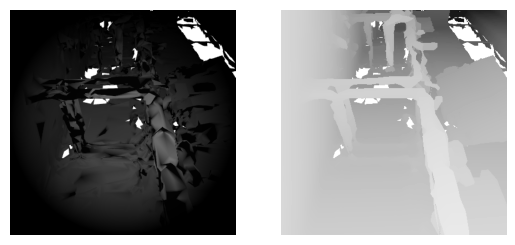

In [20]:
fuze_trimesh = trimesh.load(PATH+'SpatialMapping.obj')
mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
scene = pyrender.Scene()
scene.add(mesh)
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
s = np.sqrt(2)/2
camera_pose = np.array([
    [0.0, -s,   s,   0.3],
    [1.0,  0.0, 0.0, 0.0],
    [0.0,  s,   s,   0.35],
    [0.0,  0.0, 0.0, 1.0],
])
scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                           innerConeAngle=np.pi/16.0,
                           outerConeAngle=np.pi/6.0)
scene.add(light, pose=camera_pose)
r = pyrender.OffscreenRenderer(400, 400)
color, depth = r.render(scene)
plt.figure()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(color)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(depth, cmap=plt.cm.gray_r)
plt.show()

In [19]:
depth.shape

(400, 400)